In [1]:
import catboost
import xgboost
import lightgbm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier     
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

from asid.automl_imbalanced.abb import AutoBalanceBoost

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from hyperopt import hp, fmin, tpe

from model.reduce_model import ReduceModel, AE, VAE

In [2]:
dataset = pd.read_csv("main_datasets/dataset.csv", index_col=0)
target = pd.read_csv("main_datasets/target.csv", index_col=0)

In [3]:
reduce_model = ReduceModel(AE((1145, 286, 72, 18, 5)))

In [4]:
reduce_model.train(100)

100%|██████████| 100/100 [00:43<00:00,  2.28it/s]

Epoch 100, Train Loss: 1.0599584742902702e-05
Epoch 100, Validation Loss: 1.0537835557691075e-05


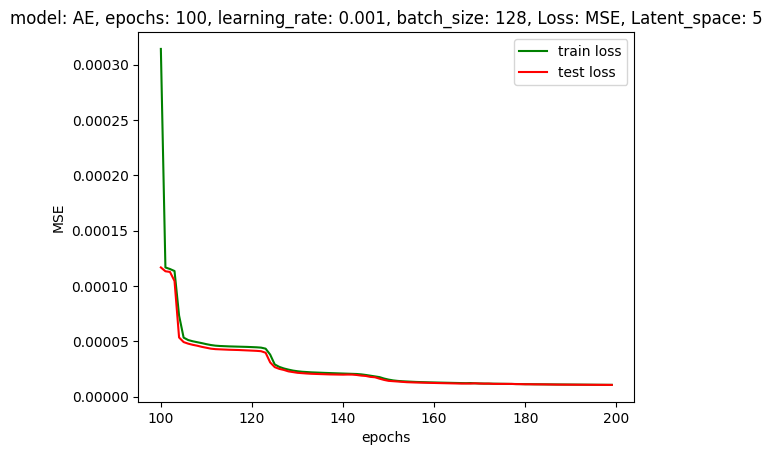

In [5]:
reduce_model.plot_loss()

In [6]:
main_reduced = reduce_model.transform(dataset)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

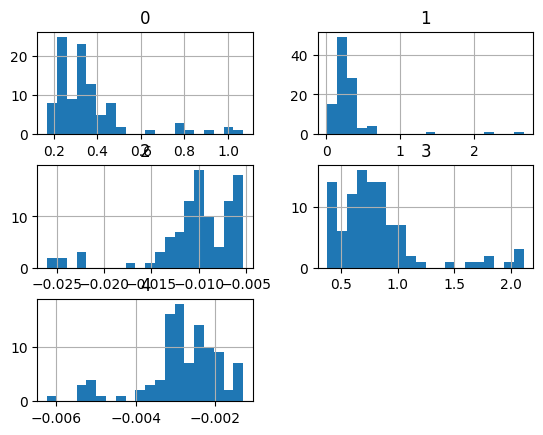

In [7]:
pd.DataFrame(main_reduced).hist(bins=20)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    main_reduced, target.values.ravel(), test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

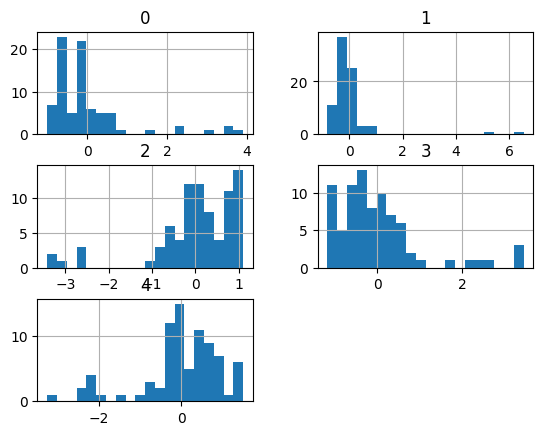

In [9]:
pd.DataFrame(X_train).hist(bins=20)

In [22]:
from sklearn.linear_model import LogisticRegression

clf = AdaBoostClassifier(estimator=LogisticRegression(), n_estimators=10, learning_rate=1)
clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=10)

In [23]:
print(metrics.classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        17
         1.0       0.00      0.00      0.00         4

    accuracy                           0.71        21
   macro avg       0.39      0.44      0.42        21
weighted avg       0.64      0.71      0.67        21

